<a href="https://colab.research.google.com/github/danielreinaux/DataAnalytics/blob/main/analise_acidentes_transito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


###Leitura dos dados


####Para esse caso específico, precisamos fazer alguns tratamentos, para que a leitura da tabeja seja feita de forma correta:
1. O parâmetro sep vai definiri o delimitador que separa os valores nas colunas do arquivo CSV

2. encoding: Usado pois muitass vezes os arquivos contem caracteres especiais em idiomas e etc.

3. quoting: Controla o reconhecimento de aspas. O valor fornecido é 3, pois dessa forma as aspas não são tratadas de forma especial em campos.

In [ ]:
df = pd.read_csv("/content/Dados_PRF_2023.csv.crdownload", sep=";", encoding="ISO-8859-1", quoting=3)


In [ ]:
df.head(3)

,"""id""","""data_inversa""","""dia_semana""","""horario""","""uf""","""br""","""km""","""municipio""","""causa_acidente""","""tipo_acidente""",...,"""feridos_graves""","""ilesos""","""ignorados""","""feridos""","""veiculos""","""latitude""","""longitude""","""regional""","""delegacia""","""uop"""
0,496519,2023-01-01,"""domingo""","""02:00:00""","""ES""",101.0,114,"""SOORETAMA""","""Ausência de reação do condutor""","""Saída de leito carroçável""",...,0,0,0,1,1,"-19,09484877","-40,05095848","""SPRF-ES""","""DEL04-ES""","""UOP01-DEL04-ES"""
1,496543,2023-01-01,"""domingo""","""03:40:00""","""SP""",116.0,"113,1","""TAUBATE""","""Entrada inopinada do pedestre""","""Atropelamento de Pedestre""",...,0,0,4,0,1,"-23,0445658","-45,58259814","""SPRF-SP""","""DEL02-SP""","""UOP02-DEL02-SP"""
2,496590,2023-01-01,"""domingo""","""01:40:00""","""MT""",163.0,1112,"""GUARANTA DO NORTE""","""Reação tardia ou ineficiente do condutor""","""Tombamento""",...,1,0,0,1,1,"-9,70020602","-54,87588757","""SPRF-MT""","""DEL06-MT""","""UOP03-DEL06-MT"""


In [ ]:
df.tail(3)

,"""id""","""data_inversa""","""dia_semana""","""horario""","""uf""","""br""","""km""","""municipio""","""causa_acidente""","""tipo_acidente""",...,"""feridos_graves""","""ilesos""","""ignorados""","""feridos""","""veiculos""","""latitude""","""longitude""","""regional""","""delegacia""","""uop"""
6768,526847,2023-05-19,"""sexta-feira""","""16:20:00""","""MG""",381.0,341,"""BELA VISTA DE MINAS""","""Velocidade Incompatível""","""Tombamento""",...,1,0,0,2,1,"-19,84403064","-43,10352396","""SPRF-MG""","""DEL03-MG""","""UOP01-DEL03-MG"""
6769,526858,2023-06-02,"""sexta-feira""","""06:00:00""","""MG""",116.0,131,"""ITAOBIM""","""Ultrapassagem Indevida""","""Colisão frontal""",...,1,1,0,2,2,"-16,69818905","-41,4999644","""SPRF-MG""","""DEL11-MG""","""UOP02-DEL11-MG"""
6770,526863,2023-06-02,"""sexta-feira""","""11:00:00""","""SC""",470.0,"10,3","""NAVEGANTES""","""Desrespeitar a preferência no cruzamento""","""Colisão frontal""",...,0,1,0,1,2,"-26,833693","-48,73724","""SPRF-SC""","""DEL04-",NaN


In [ ]:
df.shape

(6771, 30)

In [ ]:
df.dtypes

"id"                          int64
"data_inversa"               object
"dia_semana"                 object
"horario"                    object
"uf"                         object
"br"                        float64
"km"                         object
"municipio"                  object
"causa_acidente"             object
"tipo_acidente"              object
"classificacao_acidente"     object
"fase_dia"                   object
"sentido_via"                object
"condicao_metereologica"     object
"tipo_pista"                 object
"tracado_via"                object
"uso_solo"                   object
"pessoas"                     int64
"mortos"                      int64
"feridos_leves"               int64
"feridos_graves"              int64
"ilesos"                      int64
"ignorados"                   int64
"feridos"                     int64
"veiculos"                    int64
"latitude"                   object
"longitude"                  object
"regional"                  

###Análise exploratória básica:
* Para começar, farei uma análise estatísica descritiva básica, mostrando a média, mediana, desvio padrão e etc para as colunas numéricas

In [ ]:
df.describe()

,"""id""","""br""","""pessoas""","""mortos""","""feridos_leves""","""feridos_graves""","""ilesos""","""ignorados""","""feridos""","""veiculos"""
count,6771.000000,6765.000000,6771.000000,6771.000000,6771.000000,6771.000000,6771.000000,6771.000000,6771.000000,6771.000000
mean,512087.651307,215.236068,2.628858,0.141633,0.769458,0.269089,1.280756,0.167922,1.038547,1.874465
std,8662.339022,126.968812,2.435712,0.431612,1.262288,0.586621,1.840111,0.499346,1.363750,0.845292
min,496519.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,504725.500000,116.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,512004.000000,163.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,519533.500000,324.000000,3.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,2.000000
max,526863.000000,495.000000,65.000000,7.000000,61.000000,13.000000,44.000000,14.000000,62.000000,12.000000


###Análise temporal

Uma análise temporal é fundamental para entender e solucionar problemas.

Primeiramente, devemos converter o tipo data_inversa para o tipo Datetime, para assim, conseguir modelar pensando em ano, mês e dia

In [ ]:
df['"data_inversa"'] = pd.to_datetime(df['"data_inversa"'], format="%Y/%m/%d")

####1. Quantidade de acidentes mês/ano

######Para isso, irei criar uma coluna para o mês, e coluna para o ano

In [ ]:
df['ano'] = df['"data_inversa"'].dt.year #Pode ser usada tanto de YYYY-MM-DD ou DD--MM-YYYY, uma das duas configurações
df['mes'] = df['"data_inversa"'].dt.month


######Agrupando por ano e mês

In [ ]:
acidentes_por_mes = df.groupby(['ano', 'mes']).size().reset_index(name='quantidade_acidentes')



*  size(): Após o agrupamento, aplicamos o método a cada grupo. Esse método retorna a quantidade de linhas em cada grupo. Neste contexto, ele tá contando o número de acidentes para cada combinação do mês. *É um count()

* reset_index: É usado para transformar índices.


In [ ]:
acidentes_por_mes

,ano,mes,quantidade_acidentes
0,2023,1,1288
1,2023,2,1180
2,2023,3,1538
3,2023,4,1325
4,2023,5,1362
5,2023,6,78


######Agora, farei um gráfico visual. Como é um uma situação de visualização de dados temporais, usarei um gráfico de linha

Farei nesse caso um gráfio com Seaborn.

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

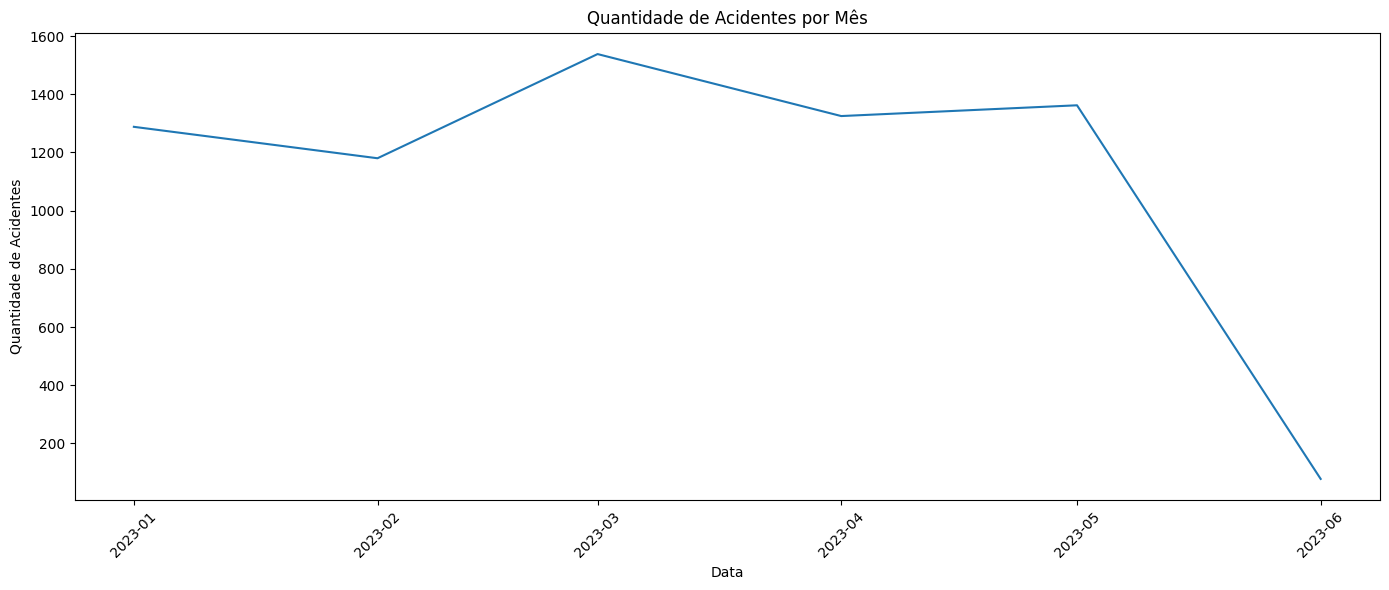

In [ ]:
# Convertendo ano e mês para uma coluna de datetime no formato 'YYYY-MM'
acidentes_por_mes['data'] = pd.to_datetime(acidentes_por_mes['ano'].astype(str) + '-' + acidentes_por_mes['mes'].astype(str) + '-01')


# Ordenando o DataFrame pela data
acidentes_por_mes.sort_values('data', inplace=True)

# Criando o gráfico
plt.figure(figsize=(14,6))
sns.lineplot(data=acidentes_por_mes, x='data', y='quantidade_acidentes')
plt.title('Quantidade de Acidentes por Mês')
plt.xlabel('Data')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Explicando o código:

1. sns.lineplot(data=acidentes_por_mes, x='data', y='quantidade_acidentes')
* Basicamente, no data é colocado o dataaset, e no X e Y, são escolhidas as colunas que serão colocadas
* o lineplot é o gráfico de linha



2.

a) plt.title('Quantidade de Acidentes por Mês')

b) plt.xlabel('Data')

c) plt.ylabel('Quantidade de Acidentes')
* Aqui é feita uma personalização do código, em que plt.title se o título, o xlabel coloca o nome do eixo X e o ylabel o nome do eixo Y

3.
a) plt.xticks(rotation=45)

b) plt.tight_layout()
* Usar sempre, para deixar organizado


####2. Acidentes em cada dia da semana


Agora, precisamos definir para o próprio dataframe, uma ordem que queremos colocar, que, por serem strings, ainda não existe

In [ ]:
acidentes_dia_semana = df.groupby('"dia_semana"').size().reset_index(name='quantidade_acidentes_dia_semana')


In [ ]:
# Definindo a ordem dos dias da semana com aspas duplas e em letras minúsculas
dias_ordenados = ['"segunda-feira"', '"terça-feira"', '"quarta-feira"', '"quinta-feira"', '"sexta-feira"', '"sábado"', '"domingo"']

# Convertendo a coluna 'dia_semana' para uma categoria ordenada
acidentes_dia_semana['"dia_semana"'] = pd.Categorical(acidentes_dia_semana['"dia_semana"'], categories=dias_ordenados, ordered=True)

# Reordenando o DataFrame baseado nas categorias ordenadas
acidentes_dia_semana = acidentes_dia_semana.sort_values('"dia_semana"')


In [ ]:
acidentes_dia_semana

,"""dia_semana""",quantidade_acidentes_dia_semana
3,"""segunda-feira""",954
6,"""terça-feira""",1006
1,"""quarta-feira""",1021
2,"""quinta-feira""",1050
4,"""sexta-feira""",1054
5,"""sábado""",931
0,"""domingo""",755


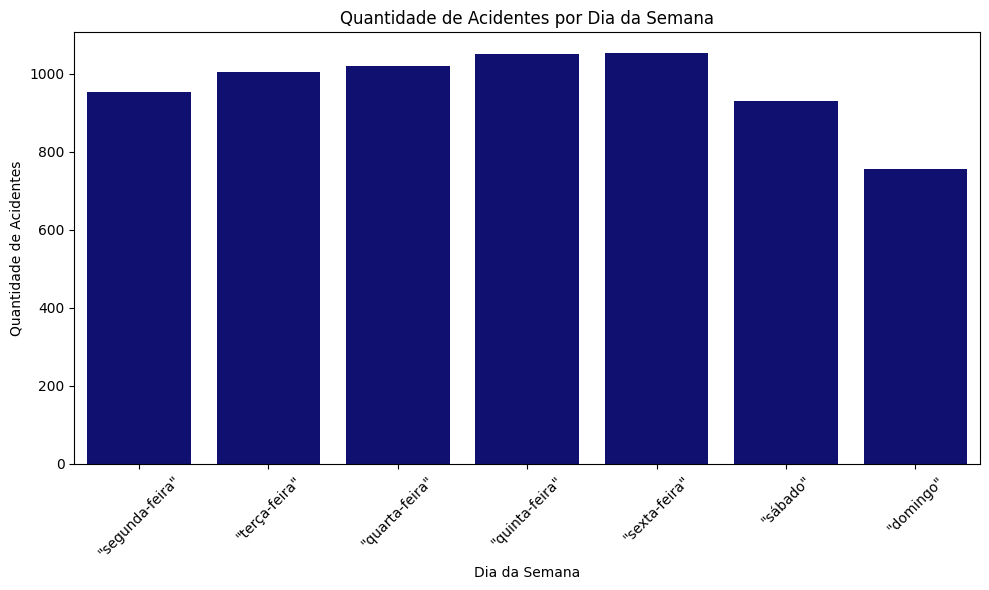

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=acidentes_dia_semana, x='"dia_semana"', y = 'quantidade_acidentes_dia_semana', color = 'navy')
plt.title('Quantidade de Acidentes por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####3. Horários com maior ocorrência de acidentes

In [ ]:
acidentes_por_horario = df.groupby('"horario"').size().reset_index(name='quantidade_acidentes_horario')

In [ ]:
acidentes_por_horario = acidentes_por_horario.sort_values(by='quantidade_acidentes_horario', ascending=False)


In [ ]:
top_10_horarios = acidentes_por_horario.head(10)


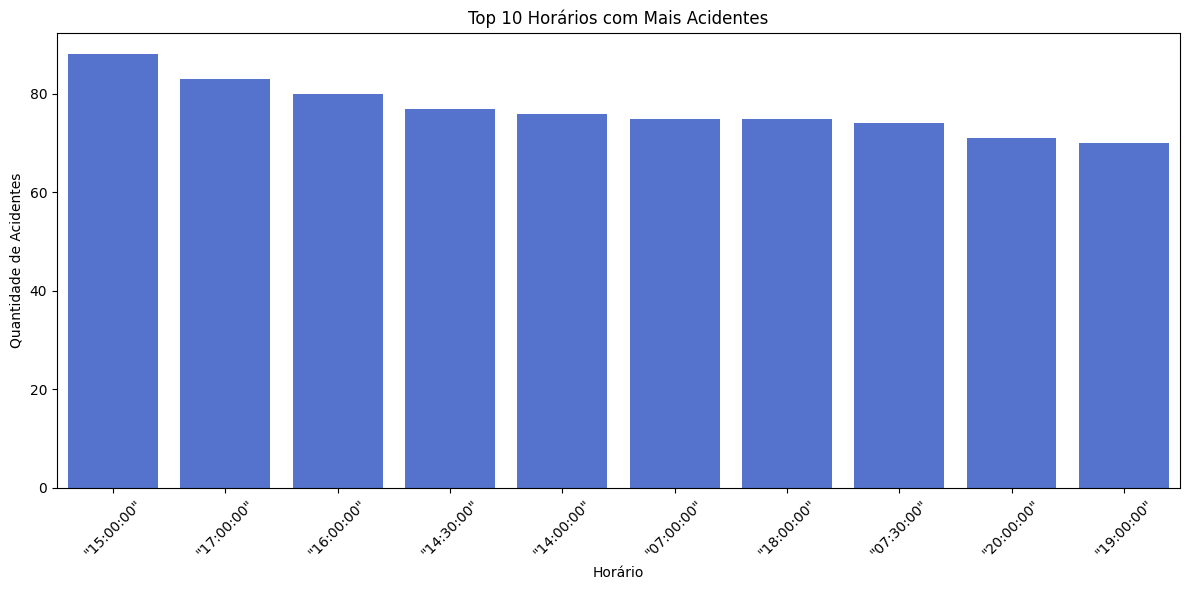

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_horarios, x='"horario"', y='quantidade_acidentes_horario', color = 'royalblue')
plt.title('Top 10 Horários com Mais Acidentes')
plt.xlabel('Horário')
plt.ylabel('Quantidade de Acidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.columns = [col.replace('"', '') for col in df.columns]

Além disso, uma análise que vejo com extrema importância é o de causa de maiores acidentes, com isso, farei essa análise:

In [ ]:
tipo_acidente = df.groupby('causa_acidente').size().reset_index(name='quantidade_por_acidente')

In [ ]:
tipo_acidente = tipo_acidente.sort_values(by='quantidade_por_acidente',ascending = False)


In [ ]:
tipo_acidente.head(10)

,causa_acidente,quantidade_por_acidente
54,"""Reação tardia ou ineficiente do condutor""",966
8,"""Ausência de reação do condutor""",869
63,"""Velocidade Incompatível""",585
0,"""Acessar a via sem observar a presença dos out...",507
40,"""Manobra de mudança de faixa""",505
14,"""Condutor deixou de manter distância do veícul...",413
23,"""Demais falhas mecânicas ou elétricas""",393
61,"""Transitar na contramão""",358
13,"""Condutor Dormindo""",294
62,"""Ultrapassagem Indevida""",244


###Análise Geográfica

####Estados com maior número de acidentes

In [ ]:
acidentes_por_estado = df.groupby('uf').size().reset_index(name='quantidade_por_estado')

In [ ]:
acidentes_por_estados = acidentes_por_estado.sort_values(by='quantidade_por_estado',ascending=False)

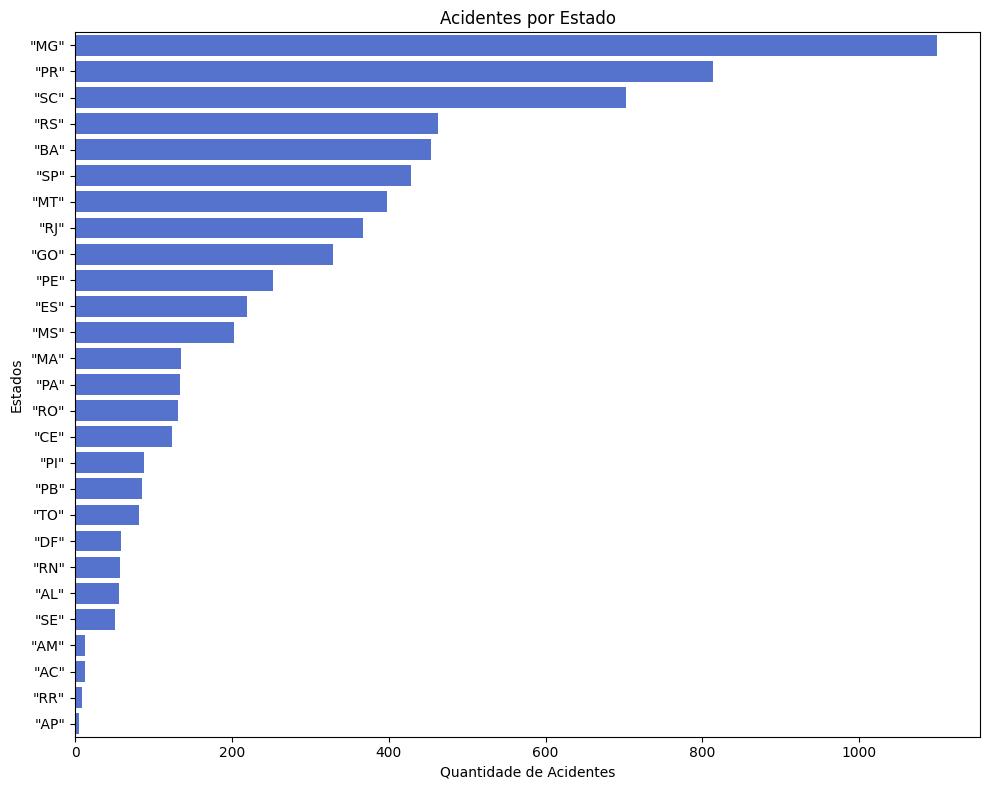

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(data=acidentes_por_estados, y='uf', x='quantidade_por_estado', color='royalblue', orient='h')
plt.title('Acidentes por Estado')
plt.xlabel('Quantidade de Acidentes')
plt.ylabel('Estados')
plt.tight_layout()
plt.show()


Criando agora um gráfico muito semelhante, porém com interatividade

In [ ]:
import plotly.express as px

fig = px.bar(acidentes_por_estados,
             x='quantidade_por_estado',
             y='uf',
             orientation='h',
             text='quantidade_por_estado',
             title='Acidentes por estado',
             labels={'uf':'Estados', 'quantidade_por_estado' : 'Quantidade de Acidentes'})

fig.update_traces(texttemplate='%{text}', textposition='outside')
fig.update_layout(uniformtext_minsize=8)
fig.show()

In [ ]:
#Explicando todo o código feito:

'''
o px.bar() é um método para criar um gráfico de barras

depois colocamos logo o nosso data

fazemos eixo X e eixo Y com as colunas destinadas e etc

Definimos a orientação das barras como horizontal

o text='quantidade_por_estados': Define qual coluna do DataFrame será usada para os rótulos de texto em cada barra (quando passar o mouse, aparecer)

Os labels Nomeian os eixos e etc


fig.update_traces(texttemplate='%{text}', textposition='outside'): Define o formato do texto, e o outside posiciona os rótulos de texto para fora das barras
esse em específico^ define como aparecerá no toque do mouse e etc
'''


####Municípios com mais ocorrências

In [ ]:
acidentes_por_municipio = df.groupby('municipio').size().reset_index(name= 'quantidade_por_municipio')

In [ ]:
acidentes_por_municipio = acidentes_por_municipio.sort_values(by='quantidade_por_municipio',ascending=True)

In [ ]:
top_10_cidades = acidentes_por_municipio.tail(10)

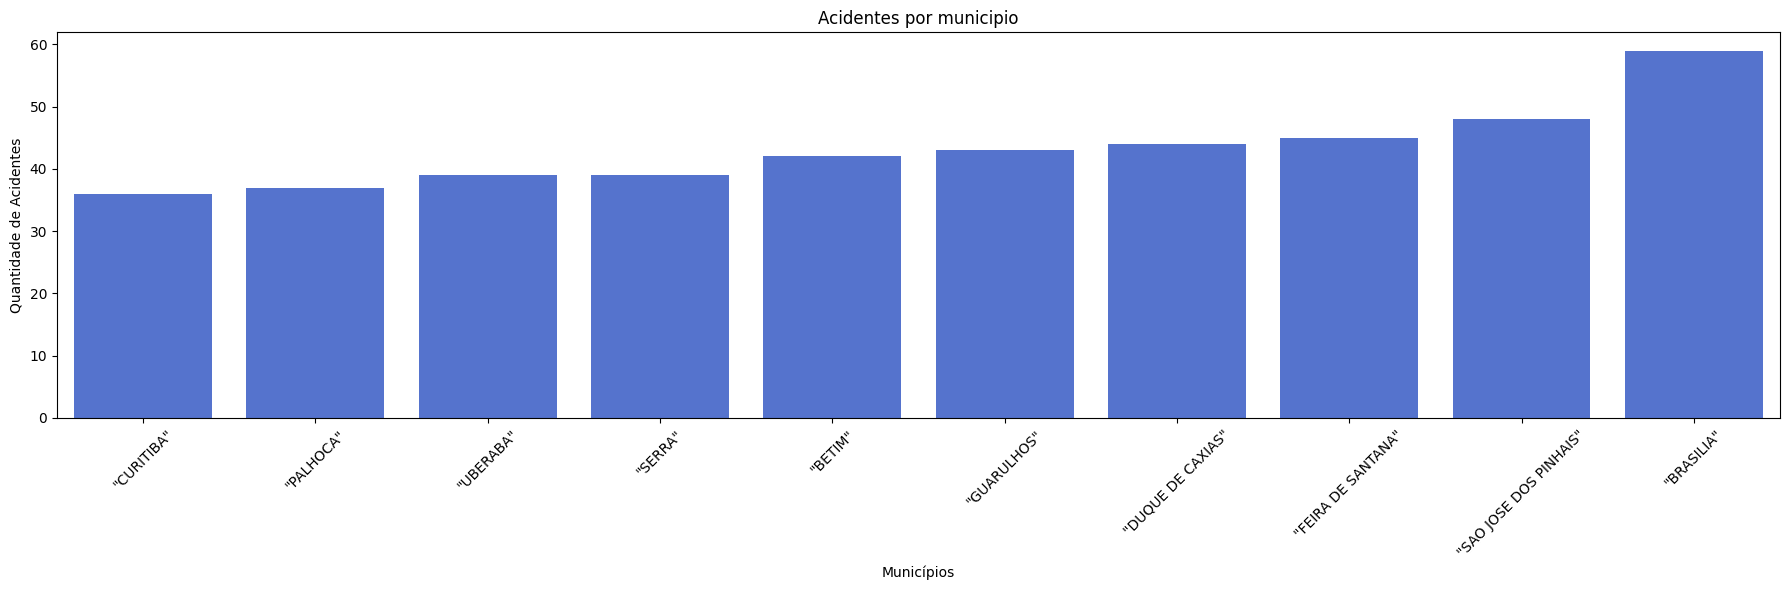

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=top_10_cidades, x='municipio', y='quantidade_por_municipio', color = 'royalblue')
plt.title('Acidentes por municipio')
plt.xlabel('Municípios')
plt.ylabel("Quantidade de Acidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####Visualização em um mapa

Nessa situação, farei o mapa do Brasil, em que, ao colocar o mouse em cima do Município, poderá ver a quantidade de acidentes

Nesse caso abaixo, fiz uma limpeza dos dados, colocando todas as colunas sem aspas duplas, deixando a sintaxe mais clara

In [ ]:
# Remover aspas duplas do nome da coluna
acidentes_por_estado.columns = [col.replace('"', '') for col in acidentes_por_estado.columns]


In [ ]:
df.dtypes

id                                 int64
data_inversa              datetime64[ns]
dia_semana                        object
horario                           object
uf                                object
br                               float64
km                                object
municipio                         object
causa_acidente                    object
tipo_acidente                     object
classificacao_acidente            object
fase_dia                          object
sentido_via                       object
condicao_metereologica            object
tipo_pista                        object
tracado_via                       object
uso_solo                          object
pessoas                            int64
mortos                             int64
feridos_leves                      int64
feridos_graves                     int64
ilesos                             int64
ignorados                          int64
feridos                            int64
veiculos        

In [ ]:
# Substitua as vírgulas por pontos e converta para float
df['latitude'] = df['latitude'].str.replace(',', '.').astype(float)
df['longitude'] = df['longitude'].str.replace(',', '.').astype(float)

# Prossiga com o cálculo da média por estado e o merge subsequente
estado_localizacao = df.groupby('uf').agg({
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

acidentes_por_estado = acidentes_por_estado.merge(estado_localizacao, left_on='uf', right_on='uf')



In [ ]:
import folium
from folium.plugins import HeatMap

# Criar mapa centrado no Brasil
m = folium.Map(location=[-14.235, -51.925], zoom_start=4)

# Preparar dados para o mapa de calor
heat_data = [[row['latitude'], row['longitude'], row['quantidade_por_estado']] for index, row in acidentes_por_estado.iterrows()]

# Adicionar o mapa de calor ao mapa
HeatMap(heat_data).add_to(m)

# Adicionar marcadores com informações de quantidade de acidentes
for index, row in acidentes_por_estado.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup='UF: {}<br>Acidentes: {}'.format(row['uf'], row['quantidade_por_estado'])
    ).add_to(m)

# Exibir o mapa
display(m)

###Insights de Negócios


####1. Foi possível analisar os estados que mais possuem acidente.

######Conhecendo os maiores gargalos de um problema, é muito mais fácil solucioná-los.  
######Logo, conhecendo os estados com piores índices, é possível focar um maior tempo e recurso neles.



####2. Foi possível observar que, diferente do que o pensamento social pensa de que nos finais de semana o trânsito tende a ser mais perigoso, e com mais acidentes, percebe-se que a média durante os dias de semana são maiores

####3. Percebe-se também que a tendência é que no começo do ano mais acidentes acontecam. Logo, é necessária uma maior atenção ao primeiro trimestre do ano